##Tutorial 8

##CSC420 - Fall 2021

##Babak Taati

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# install OpenCV
!pip install opencv-python
import cv2

# Optical Flow

##let's start with sparse optical flow
here we show it on an image pair. For practice, try sparse optical flow tracking on live camera feed (not in Colab). We had a video demo in Tutorial 3 that you can build up on.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x15c765b6310>)

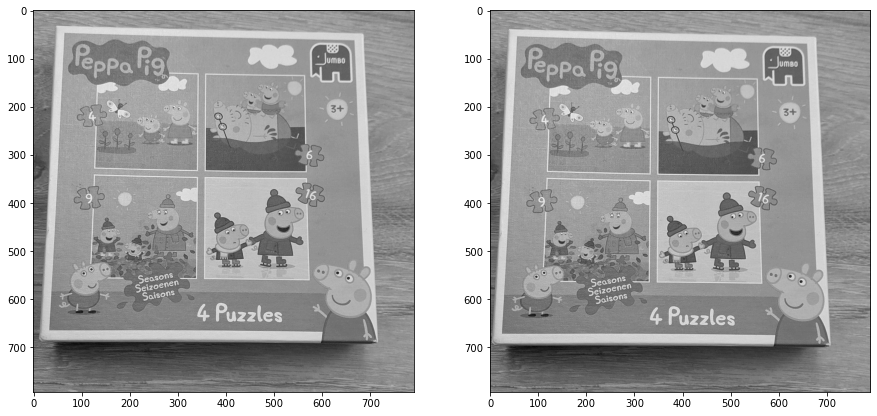

In [5]:
img = cv2.imread('./images/Peppa.jpg') 

shift1 = 7 
shift2 = -9

# let's first artificially generate a movement
img_prev = img[shift1:,:shift2,:] # shift a few pixels down
img_current = img[:-shift1,-shift2:,:] # shift a few pixels to the right

gray_prev = cv2.cvtColor(img_prev, cv2.COLOR_BGR2GRAY)
gray_current = cv2.cvtColor(img_current, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(gray_prev,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(gray_current,cmap = 'gray')


In [6]:
gray_current.shape

(793, 791)

In [7]:
gray_prev.shape

(793, 791)

In [8]:
# select 50 corners using the Shi-Thomasi method (recall from Tutorial 7)
pts_prev = cv2.goodFeaturesToTrack(gray_prev, maxCorners=50, qualityLevel=0.1, minDistance=10)

In [9]:
img_prev_copy = img_prev.copy()

for i in pts_prev:
  x,y = i.ravel()
  cv2.circle(img_prev_copy, (x,y), 5, (255,255,0), -1)

plt.figure(figsize=(10,10))
plt.imshow(img_prev_copy)
plt.xticks([]), plt.yticks([])

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


In [ ]:
# sparse optical flow 
opt_flow_params = dict(winSize=(50,50), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,0.03))
pts_moved, status, err = cv2.calcOpticalFlowPyrLK(gray_prev, gray_current, pts_prev, None, **opt_flow_params)
# look up SparsePyrLKOpticalFlow and SparseOpticalFlow on OpenCV documentations

In [ ]:
print(pts_prev.shape)
print(pts_moved.shape)

In [ ]:
img_current_copy = img_current.copy()

for i in pts_moved:
  x,y = i.ravel()
  cv2.circle(img_current_copy, (x,y), 5, (255,255,0), -1)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img_prev_copy)
plt.subplot(1,2,2), plt.imshow(img_current_copy)

In [ ]:
pts_prev - pts_moved

In [ ]:
np.mean(pts_moved - pts_prev, axis=0)

In [ ]:
# mean error (in pixels)
( np.mean(pts_moved - pts_prev, axis=0) - [shift2,shift1] ) 

In [ ]:
# max error (in pixels)
( np.max(pts_moved - pts_prev, axis=0) - [shift2,shift1] ) 

## now let's do dense optical flow on the same image pair
Again, here we show it on an image pair. 

In [ ]:
flow = cv2.calcOpticalFlowFarneback(gray_prev, gray_current, None, pyr_scale=0.5, levels=5, winsize=15, iterations=10, poly_n=5, poly_sigma=1.0, flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(flow[:,:,0])
plt.subplot(1,2,2), plt.imshow(flow[:,:,1])

In [ ]:
flow[0:5,0:4,0]

hmm ... we were expecting them all to be around 7. what's going on?

In [ ]:
flow[0:5,0:4,1]

In [ ]:
np.median(flow[:,:,0])

that was better!

In [ ]:
np.median(flow[:,:,1])

In [ ]:
# let's see where in the image the X errors are smaller than 0.05 pixels
x_good = np.abs(flow[:,:,0] - shift2) < 0.05
y_good = np.abs(flow[:,:,1] - shift1) < 0.05

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(x_good,cmap='gray')
plt.subplot(1,2,2), plt.imshow(y_good,cmap='gray')

In [ ]:
# show on the (prev) image
xy_good = np.bitwise_and(x_good, y_good)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img_prev)
plt.subplot(1,2,2), plt.imshow( cv2.bitwise_and(img_prev, img_prev, dst=None, mask=np.uint8(xy_good)) )

## To run optical flow on live camera feed (not in Colab) refer back to Tutorial 3. 
What cool stuff can you do with it? 
1. Can you color-code movements in each direction? (left/up/right/bottom) (see here for example: https://docs.opencv.org/4.1.2/d4/dee/tutorial_optical_flow.html)
2. Can you color-code towards the camera movements (e.g. red=movement towards the camera, blue=movement away from the camera, black= not moving, or movements left/right or up/down). Remember *divergence* from Calculus?